In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns

In [9]:
dados = pd.read_csv('./train.csv')

#GUARDAR O ID
id = dados[['PassengerId']]
#COMPARAR DEPOIS 
y_env = dados[['Survived']]


In [10]:
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#dados.info()

In [12]:
def sex(x):
    if x == 'male':
        return 0
    if x == 'female':
        return 1

In [13]:
dados['Sex'] = dados['Sex'].apply(sex)

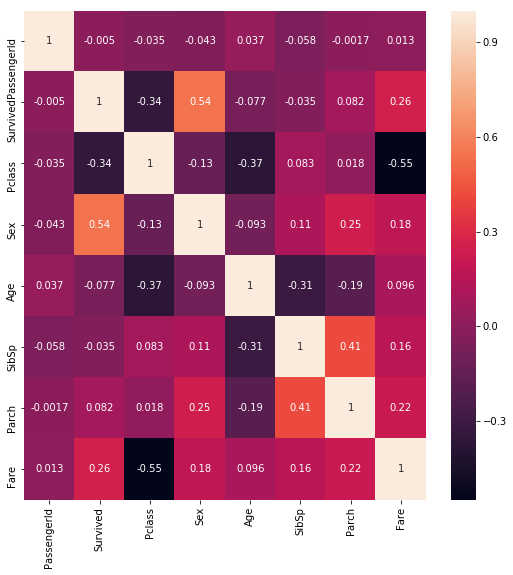

In [14]:
plt.figure(figsize = (9,9))
sns.heatmap(dados.corr(),annot = True)

In [15]:
dados = dados.drop(['PassengerId','Name','Parch','Ticket','Cabin',"Embarked",'Fare','SibSp'],axis =1)

In [16]:
dados.head(10)

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
5,0,3,0,NaN
6,0,1,0,54.0
7,0,3,0,2.0
8,1,3,1,27.0
9,1,2,1,14.0


In [17]:
dados

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
5,0,3,0,NaN
6,0,1,0,54.0
7,0,3,0,2.0
8,1,3,1,27.0
9,1,2,1,14.0


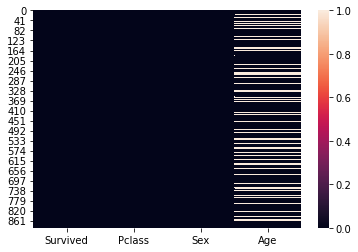

In [18]:
sns.heatmap(dados.isnull())

In [19]:
#Podemos retirar os dados que são NaN

#dados = dados.dropna().reset_index().drop('index',axis=1)

In [20]:
# tudo que for NaN vira valor Médio
def media_age(x):
    if np.isnan(x) == True :
        return int(dados['Age'].mean())
        
    else:
        return x

    
dados['Age'] = dados['Age'].apply(media_age)

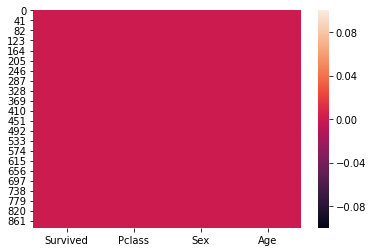

In [21]:
sns.heatmap(dados.isnull())

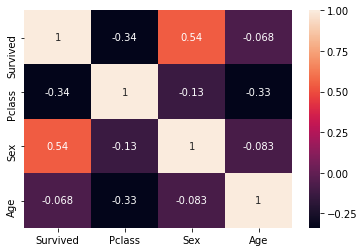

In [22]:
sns.heatmap(dados.corr(),annot = True)

In [23]:
X = dados.drop('Survived',axis=1)
y = dados[['Survived']]

In [24]:
X

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
5,3,0,29.0
6,1,0,54.0
7,3,0,2.0
8,3,1,27.0
9,2,1,14.0


In [25]:
X.shape,y.shape

((891, 3), (891, 1))

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#sc = StandardScaler()
sc = MinMaxScaler()
X = sc.fit_transform(X) #VOU USAR ESSE X no fim

In [27]:
X.shape

(891, 3)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.01,
)

In [30]:
X_train.shape,y_train.shape

((882, 3), (882, 1))

In [31]:
X_test.shape,y_test.shape

((9, 3), (9, 1))

In [34]:
def creat_model(n):
  model = tf.keras.models.Sequential()



  model.add(tf.keras.layers.Dense(
      units = n*4,
      activation = 'relu',
      input_shape = (X_train.shape[1],)
  ))

  model.add(tf.keras.layers.Dense(
      units = n*2,
      activation = 'relu',
      
  ))
  



  model.add(tf.keras.layers.Dense(
      units = 1,
      activation = 'sigmoid',
  ))

  #model.summary()

  model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])


  return model

def treinar(model, epochs):

  history = model.fit(
      X_train,
      y_train,
      validation_split=0.1,
      epochs = epochs,
      shuffle = True,
      )
  return history

  #history.history.keys()

def cond(x):
    if x > 0.5:
      return 1
    else:
      return 0

def predict(X,y,model):

  pred_train = model.predict(X)
  pred_train.shape

  pred_df = pd.DataFrame()
  pred_df['pred'] = pred_train[:,0]

  pred_df['pred'] = pred_df['pred'].apply(cond)

  y_train_pred = y.join(pred_df)

  k = 0
  total = len(y_train_pred['pred'])

  for x,y in zip(y_train_pred['pred'],y_train_pred['Survived']):
      if x == y:
          k = k+1
  p = k/total
  p_ = np.around(p*100,2)
  print(f"Porcentagem de Acerto {p_}%")
  return p_


In [35]:
v ={}
for n in range(5,100,5):
  model = creat_model(n)
  history= treinar(model,50)
  v[str(n)] = [predict(X_train,y_train,model),predict(X_test,y_test,model),history,model]


Train on 793 samples, validate on 89 samples
Epoch 1/50
793/793 [==============================] - 1s 758us/sample - loss: 0.7163 - accuracy: 0.4048 - val_loss: 0.6783 - val_accuracy: 0.6966
Epoch 2/50
793/793 [==============================] - 0s 135us/sample - loss: 0.6516 - accuracy: 0.7238 - val_loss: 0.6243 - val_accuracy: 0.7528
Epoch 3/50
793/793 [==============================] - 0s 101us/sample - loss: 0.6040 - accuracy: 0.7465 - val_loss: 0.5798 - val_accuracy: 0.7191
Epoch 4/50
793/793 [==============================] - 0s 139us/sample - loss: 0.5622 - accuracy: 0.7516 - val_loss: 0.5424 - val_accuracy: 0.7303
Epoch 5/50
793/793 [==============================] - 0s 142us/sample - loss: 0.5251 - accuracy: 0.7705 - val_loss: 0.5115 - val_accuracy: 0.7416
Epoch 6/50
793/793 [==============================] - 0s 133us/sample - loss: 0.4982 - accuracy: 0.7907 - val_loss: 0.4899 - val_accuracy: 0.7416
Epoch 7/50
793/793 [==============================] - 0s 105us/sample - loss: 0

Epoch 6/50
793/793 [==============================] - 0s 100us/sample - loss: 0.4601 - accuracy: 0.7894 - val_loss: 0.4619 - val_accuracy: 0.7416
Epoch 7/50
793/793 [==============================] - 0s 104us/sample - loss: 0.4563 - accuracy: 0.7907 - val_loss: 0.4547 - val_accuracy: 0.7416
Epoch 8/50
793/793 [==============================] - 0s 126us/sample - loss: 0.4528 - accuracy: 0.7982 - val_loss: 0.4494 - val_accuracy: 0.7416
Epoch 9/50
793/793 [==============================] - 0s 154us/sample - loss: 0.4504 - accuracy: 0.7894 - val_loss: 0.4531 - val_accuracy: 0.7416
Epoch 10/50
793/793 [==============================] - 0s 136us/sample - loss: 0.4485 - accuracy: 0.7894 - val_loss: 0.4442 - val_accuracy: 0.7416
Epoch 11/50
793/793 [==============================] - 0s 81us/sample - loss: 0.4466 - accuracy: 0.7894 - val_loss: 0.4429 - val_accuracy: 0.7416
Epoch 12/50
793/793 [==============================] - 0s 79us/sample - loss: 0.4457 - accuracy: 0.7932 - val_loss: 0.4415 

793/793 [==============================] - 0s 97us/sample - loss: 0.4376 - accuracy: 0.7982 - val_loss: 0.4230 - val_accuracy: 0.7640
Epoch 17/50
793/793 [==============================] - 0s 134us/sample - loss: 0.4375 - accuracy: 0.8020 - val_loss: 0.4221 - val_accuracy: 0.7640
Epoch 18/50
793/793 [==============================] - 0s 144us/sample - loss: 0.4370 - accuracy: 0.7995 - val_loss: 0.4188 - val_accuracy: 0.7640
Epoch 19/50
793/793 [==============================] - 0s 79us/sample - loss: 0.4386 - accuracy: 0.7919 - val_loss: 0.4302 - val_accuracy: 0.7416
Epoch 20/50
793/793 [==============================] - 0s 111us/sample - loss: 0.4377 - accuracy: 0.7957 - val_loss: 0.4110 - val_accuracy: 0.7865
Epoch 21/50
793/793 [==============================] - 0s 147us/sample - loss: 0.4358 - accuracy: 0.7982 - val_loss: 0.4137 - val_accuracy: 0.7640
Epoch 22/50
793/793 [==============================] - 0s 137us/sample - loss: 0.4390 - accuracy: 0.7907 - val_loss: 0.4100 - val_ac

793/793 [==============================] - 0s 103us/sample - loss: 0.4361 - accuracy: 0.7907 - val_loss: 0.4111 - val_accuracy: 0.7753
Epoch 27/50
793/793 [==============================] - 0s 102us/sample - loss: 0.4389 - accuracy: 0.7894 - val_loss: 0.4110 - val_accuracy: 0.7753
Epoch 28/50
793/793 [==============================] - 0s 106us/sample - loss: 0.4366 - accuracy: 0.7881 - val_loss: 0.4151 - val_accuracy: 0.7753
Epoch 29/50
793/793 [==============================] - 0s 88us/sample - loss: 0.4351 - accuracy: 0.7957 - val_loss: 0.4235 - val_accuracy: 0.7640
Epoch 30/50
793/793 [==============================] - 0s 94us/sample - loss: 0.4362 - accuracy: 0.7919 - val_loss: 0.4211 - val_accuracy: 0.7640
Epoch 31/50
793/793 [==============================] - 0s 132us/sample - loss: 0.4361 - accuracy: 0.8020 - val_loss: 0.4101 - val_accuracy: 0.7865
Epoch 32/50
793/793 [==============================] - 0s 82us/sample - loss: 0.4383 - accuracy: 0.7881 - val_loss: 0.4308 - val_acc

793/793 [==============================] - 0s 116us/sample - loss: 0.4340 - accuracy: 0.7982 - val_loss: 0.4061 - val_accuracy: 0.7753
Epoch 37/50
793/793 [==============================] - 0s 124us/sample - loss: 0.4333 - accuracy: 0.7982 - val_loss: 0.4101 - val_accuracy: 0.7865
Epoch 38/50
793/793 [==============================] - 0s 105us/sample - loss: 0.4325 - accuracy: 0.7932 - val_loss: 0.4085 - val_accuracy: 0.7753
Epoch 39/50
793/793 [==============================] - 0s 102us/sample - loss: 0.4328 - accuracy: 0.7907 - val_loss: 0.4113 - val_accuracy: 0.7753
Epoch 40/50
793/793 [==============================] - 0s 106us/sample - loss: 0.4342 - accuracy: 0.7970 - val_loss: 0.4294 - val_accuracy: 0.7640
Epoch 41/50
793/793 [==============================] - 0s 106us/sample - loss: 0.4358 - accuracy: 0.7919 - val_loss: 0.4205 - val_accuracy: 0.7865
Epoch 42/50
793/793 [==============================] - 0s 106us/sample - loss: 0.4334 - accuracy: 0.8071 - val_loss: 0.4111 - val_

793/793 [==============================] - 0s 120us/sample - loss: 0.4351 - accuracy: 0.7907 - val_loss: 0.4113 - val_accuracy: 0.7865
Epoch 47/50
793/793 [==============================] - 0s 98us/sample - loss: 0.4350 - accuracy: 0.8045 - val_loss: 0.4111 - val_accuracy: 0.7753
Epoch 48/50
793/793 [==============================] - 0s 101us/sample - loss: 0.4337 - accuracy: 0.7970 - val_loss: 0.4083 - val_accuracy: 0.7978
Epoch 49/50
793/793 [==============================] - 0s 116us/sample - loss: 0.4328 - accuracy: 0.8083 - val_loss: 0.4051 - val_accuracy: 0.7865
Epoch 50/50
793/793 [==============================] - 0s 96us/sample - loss: 0.4339 - accuracy: 0.7957 - val_loss: 0.4056 - val_accuracy: 0.7978
Porcentagem de Acerto 55.67%
Porcentagem de Acerto 0.0%
Train on 793 samples, validate on 89 samples
Epoch 1/50
793/793 [==============================] - 0s 618us/sample - loss: 0.5674 - accuracy: 0.7591 - val_loss: 0.4907 - val_accuracy: 0.7416
Epoch 2/50
793/793 [============

Train on 793 samples, validate on 89 samples
Epoch 1/50
793/793 [==============================] - 1s 676us/sample - loss: 0.5653 - accuracy: 0.7856 - val_loss: 0.4833 - val_accuracy: 0.7416
Epoch 2/50
793/793 [==============================] - 0s 116us/sample - loss: 0.4666 - accuracy: 0.7907 - val_loss: 0.4567 - val_accuracy: 0.7416
Epoch 3/50
793/793 [==============================] - 0s 102us/sample - loss: 0.4525 - accuracy: 0.7907 - val_loss: 0.4362 - val_accuracy: 0.7865
Epoch 4/50
793/793 [==============================] - 0s 106us/sample - loss: 0.4524 - accuracy: 0.7869 - val_loss: 0.4282 - val_accuracy: 0.7865
Epoch 5/50
793/793 [==============================] - 0s 113us/sample - loss: 0.4452 - accuracy: 0.7945 - val_loss: 0.4341 - val_accuracy: 0.7416
Epoch 6/50
793/793 [==============================] - 0s 118us/sample - loss: 0.4439 - accuracy: 0.8033 - val_loss: 0.4193 - val_accuracy: 0.7640
Epoch 7/50
793/793 [==============================] - 0s 121us/sample - loss: 0

Epoch 6/50
793/793 [==============================] - 0s 110us/sample - loss: 0.4430 - accuracy: 0.7957 - val_loss: 0.4414 - val_accuracy: 0.7416
Epoch 7/50
793/793 [==============================] - 0s 152us/sample - loss: 0.4434 - accuracy: 0.7806 - val_loss: 0.4206 - val_accuracy: 0.7753
Epoch 8/50
793/793 [==============================] - 0s 135us/sample - loss: 0.4404 - accuracy: 0.7982 - val_loss: 0.4190 - val_accuracy: 0.7753
Epoch 9/50
793/793 [==============================] - 0s 122us/sample - loss: 0.4391 - accuracy: 0.7881 - val_loss: 0.4329 - val_accuracy: 0.7416
Epoch 10/50
793/793 [==============================] - 0s 124us/sample - loss: 0.4425 - accuracy: 0.7869 - val_loss: 0.4289 - val_accuracy: 0.7640
Epoch 11/50
793/793 [==============================] - 0s 117us/sample - loss: 0.4407 - accuracy: 0.7894 - val_loss: 0.4110 - val_accuracy: 0.7865
Epoch 12/50
793/793 [==============================] - 0s 130us/sample - loss: 0.4377 - accuracy: 0.7894 - val_loss: 0.422

793/793 [==============================] - 0s 178us/sample - loss: 0.4375 - accuracy: 0.7945 - val_loss: 0.4114 - val_accuracy: 0.7753
Epoch 17/50
793/793 [==============================] - 0s 106us/sample - loss: 0.4377 - accuracy: 0.7932 - val_loss: 0.4119 - val_accuracy: 0.7753
Epoch 18/50
793/793 [==============================] - 0s 129us/sample - loss: 0.4366 - accuracy: 0.7894 - val_loss: 0.4111 - val_accuracy: 0.7753
Epoch 19/50
793/793 [==============================] - 0s 103us/sample - loss: 0.4397 - accuracy: 0.7970 - val_loss: 0.4087 - val_accuracy: 0.7753
Epoch 20/50
793/793 [==============================] - 0s 124us/sample - loss: 0.4413 - accuracy: 0.7869 - val_loss: 0.4319 - val_accuracy: 0.7416
Epoch 21/50
793/793 [==============================] - 0s 102us/sample - loss: 0.4371 - accuracy: 0.8033 - val_loss: 0.4081 - val_accuracy: 0.7865
Epoch 22/50
793/793 [==============================] - 0s 136us/sample - loss: 0.4374 - accuracy: 0.7806 - val_loss: 0.4137 - val_

793/793 [==============================] - 0s 125us/sample - loss: 0.4385 - accuracy: 0.7970 - val_loss: 0.4183 - val_accuracy: 0.7753
Epoch 27/50
793/793 [==============================] - 0s 148us/sample - loss: 0.4327 - accuracy: 0.8020 - val_loss: 0.4058 - val_accuracy: 0.7753
Epoch 28/50
793/793 [==============================] - 0s 120us/sample - loss: 0.4366 - accuracy: 0.7995 - val_loss: 0.4208 - val_accuracy: 0.7865
Epoch 29/50
793/793 [==============================] - 0s 142us/sample - loss: 0.4390 - accuracy: 0.8033 - val_loss: 0.4252 - val_accuracy: 0.7640
Epoch 30/50
793/793 [==============================] - 0s 110us/sample - loss: 0.4347 - accuracy: 0.7957 - val_loss: 0.4198 - val_accuracy: 0.7753
Epoch 31/50
793/793 [==============================] - 0s 125us/sample - loss: 0.4351 - accuracy: 0.7982 - val_loss: 0.4089 - val_accuracy: 0.7865
Epoch 32/50
793/793 [==============================] - 0s 184us/sample - loss: 0.4345 - accuracy: 0.7932 - val_loss: 0.4150 - val_

793/793 [==============================] - 0s 170us/sample - loss: 0.4306 - accuracy: 0.8020 - val_loss: 0.4080 - val_accuracy: 0.7978
Epoch 37/50
793/793 [==============================] - 0s 143us/sample - loss: 0.4361 - accuracy: 0.8071 - val_loss: 0.4006 - val_accuracy: 0.8202
Epoch 38/50
793/793 [==============================] - 0s 175us/sample - loss: 0.4320 - accuracy: 0.8172 - val_loss: 0.4064 - val_accuracy: 0.7978
Epoch 39/50
793/793 [==============================] - 0s 141us/sample - loss: 0.4314 - accuracy: 0.7982 - val_loss: 0.4031 - val_accuracy: 0.7978
Epoch 40/50
793/793 [==============================] - 0s 129us/sample - loss: 0.4305 - accuracy: 0.7907 - val_loss: 0.4069 - val_accuracy: 0.7865
Epoch 41/50
793/793 [==============================] - 0s 138us/sample - loss: 0.4294 - accuracy: 0.8020 - val_loss: 0.4040 - val_accuracy: 0.7865
Epoch 42/50
793/793 [==============================] - 0s 114us/sample - loss: 0.4292 - accuracy: 0.8045 - val_loss: 0.3994 - val_

In [36]:
v

{'5': [53.4,
  0.0,
 '10': [53.17,
  0.0,
 '15': [54.88,
  0.0,
 '20': [53.97,
  0.0,
 '25': [53.51,
  0.0,
 '30': [54.99,
  0.0,
 '35': [55.67,
  0.0,
 '40': [54.42,
  0.0,
 '45': [54.42,
  0.0,
 '50': [55.67,
  0.0,
 '55': [56.12,
  0.0,
 '60': [52.95,
  0.0,
 '65': [52.49,
  0.0,
 '70': [55.78,
  0.0,
 '75': [53.17,
  0.0,
 '80': [56.35,
  0.0,
 '85': [55.9,
  0.0,
 '90': [54.54,
  0.0,
 '95': [55.78,
  0.0,
  <tensorflow.python.keras.engine.sequential.Sequential at 0x7faf380eb7b8>]}

In [37]:
def plot(history):

  plt.figure()
  plt.plot(history.history['accuracy'],'.r', label = 'acc',alpha = 0.3)
  plt.plot(history.history['val_accuracy'], '.b', label = 'acc_val',alpha = 0.3)
  plt.legend()
  plt.grid()

  plt.figure()
  plt.plot(history.history['loss'],'.r', label = 'loss',alpha = 0.3)
  plt.plot(history.history['val_loss'],'.b', label = 'loss_val',alpha = 0.3)
  plt.legend()
  plt.grid()

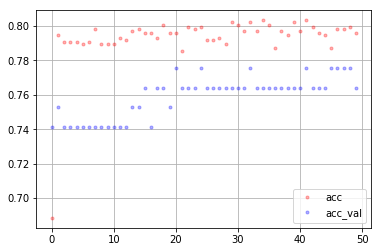

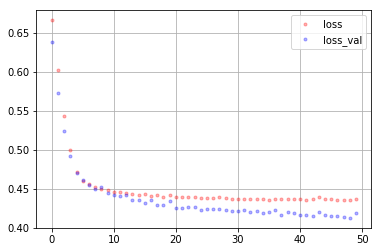

In [67]:
plot(v['10'][2])

## PREDIÇÕES

Analisar qual melhor modelo

In [74]:
for k in v.keys():
    print(k)
    predict(X,y_env,v[k][3])

5
Porcentagem de Acerto 79.91%
10
Porcentagem de Acerto 79.91%
15
Porcentagem de Acerto 79.35%
20
Porcentagem de Acerto 81.14%
25
Porcentagem de Acerto 79.69%
30
Porcentagem de Acerto 79.35%
35
Porcentagem de Acerto 79.8%
40
Porcentagem de Acerto 80.47%
45
Porcentagem de Acerto 80.25%
50
Porcentagem de Acerto 80.02%
55
Porcentagem de Acerto 80.25%
60
Porcentagem de Acerto 80.81%
65
Porcentagem de Acerto 79.35%
70
Porcentagem de Acerto 80.13%
75
Porcentagem de Acerto 80.47%
80
Porcentagem de Acerto 79.8%
85
Porcentagem de Acerto 80.25%
90
Porcentagem de Acerto 80.36%
95
Porcentagem de Acerto 80.13%


### Todos Dados reservados para teste

In [75]:
def sex(x):
    if x == 'male':
        return 0
    if x == 'female':
        return 1

In [76]:
dados_test = pd.read_csv('./test.csv')

dados_x_test = dados_test.drop(['PassengerId','Name','Parch','Ticket','Cabin',"Embarked",'Fare','SibSp'],axis =1)
#dados_y_test = Não sabemos... eles não disponibilizam

In [77]:
dados_x_test['Sex'] = dados_x_test['Sex'].apply(sex)

In [78]:
dados_x_test = sc.fit_transform(dados_x_test)

In [79]:
#prev_env = model.predict(X)
prev_env = v['65'][3].predict(dados_x_test)

In [80]:
dados_env = pd.DataFrame()
dados_env['PassengerId'] = dados_test['PassengerId']
dados_env['Survived'] = prev_env[:,0]

dados_env['Survived'] = dados_env['Survived'].apply(cond)

In [85]:
dados_env.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf0cf5b080>]],
      dtype=object)

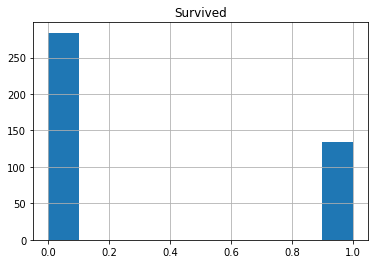

In [87]:
dados_env.hist('Survived') # Está Coerente

In [83]:
#Salvar dados

dados_env.to_csv('./Titanic_Predictions.csv',index=False)

